In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/Users/shuvayandasgupt/Downloads/Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
#info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
#fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
#chest pain type(1: typical angina,2: atypical angina,3: non-anginal pain,4: asymptomatic)
#slope: the slope of the peak exercise ST segment(1: upsloping,2: flat,3: downsloping)
#exercise induced angina (1 = yes; 0 = no)
#ekg results: resting electrocardiographic results(0: normal,2: showing probable or definite left ventricular hypertrophy by Estes' criteria)


In [6]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [7]:
df.shape

(270, 14)

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values #target

<Axes: xlabel='Heart Disease', ylabel='count'>

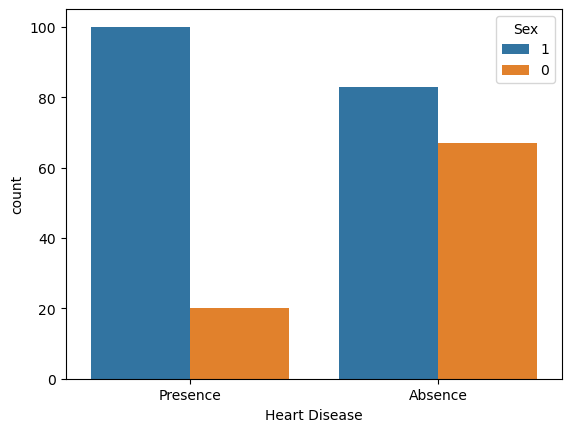

In [9]:
df['Sex'] = df['Sex'].astype(str)
df['Heart Disease'] = df['Heart Disease'].astype(str)
sns.countplot(x='Heart Disease', hue = 'Sex', data=df)

In [10]:
#Male are more prone to heart disease than female

<Axes: xlabel='Heart Disease', ylabel='count'>

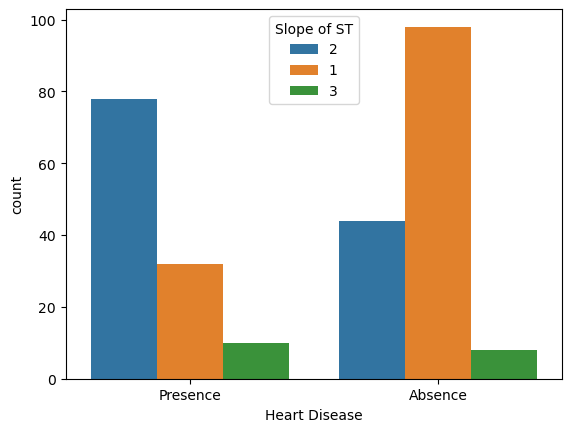

In [11]:
df['Slope of ST'] = df['Slope of ST'].astype(str)
sns.countplot(x='Heart Disease', hue = 'Slope of ST', data=df)

In [12]:
#downsloping of "Slope of ST" assures very less chances of heart disease
#Flat of "Sloping of ST" assures higher chances of heart disease

<Axes: xlabel='Heart Disease', ylabel='count'>

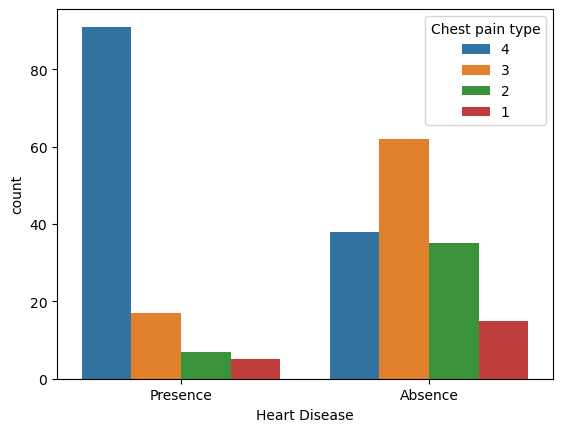

In [13]:
df['Chest pain type'] = df['Chest pain type'].astype(str)
sns.countplot(x=df['Heart Disease'], hue = 'Chest pain type', data=df)

In [14]:
#4 represes asymptomic chest pain and it shows that chances of heart disease is higher
#where as non-anginal pain, typical anginal pain is there, very less chance of heart disease

<Axes: xlabel='Sex', ylabel='BP'>

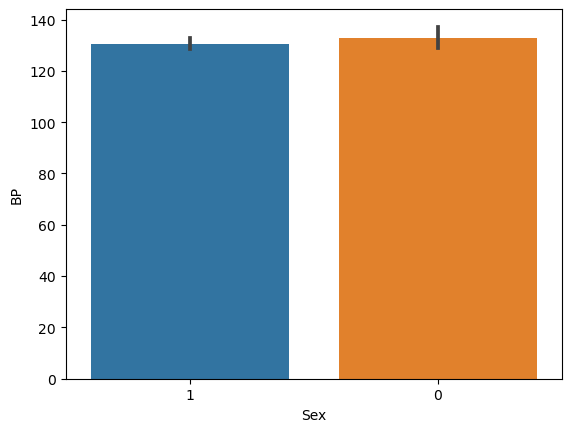

In [15]:
sns.barplot(x= 'Sex', y = 'BP', data=df)

In [16]:
#Blood pressure is mostly same in both genders

<Axes: xlabel='Sex', ylabel='Cholesterol'>

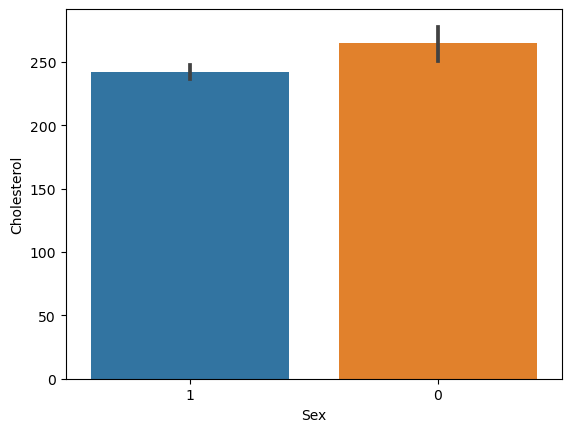

In [17]:
sns.barplot(x= 'Sex', y = 'Cholesterol', data=df)

In [18]:
#Female have higher cholesterol

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

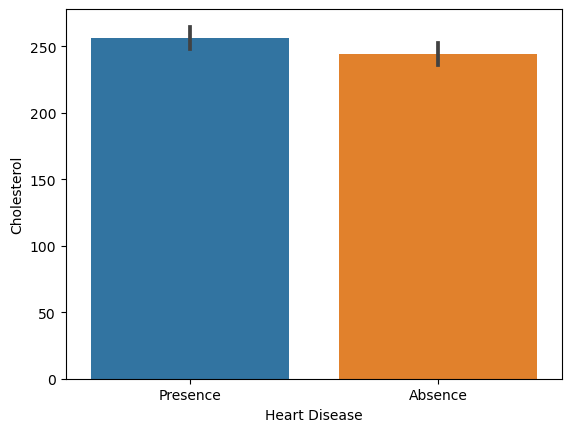

In [19]:
sns.barplot(x=df['Heart Disease'], y = df['Cholesterol'], data=df)

In [20]:
#Although cholesterol is not bigger impact but presence of cholesterol increases the potential of heart disease

<Axes: xlabel='Heart Disease', ylabel='BP'>

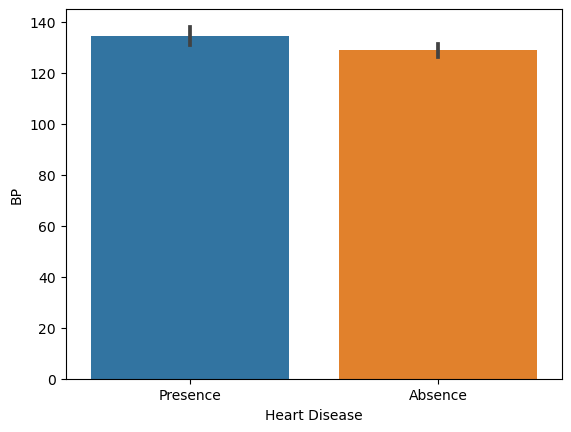

In [21]:
sns.barplot(x=df['Heart Disease'], y = df['BP'], data=df)

In [22]:
#Similar infrence as cholesterol

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='BP'>

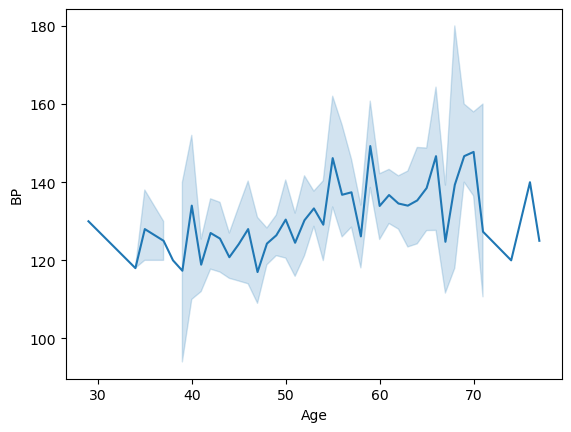

In [23]:
sns.lineplot(x='Age', y = 'BP', data=df)

In [24]:
#Blood pressure is at its peak at the age of 55-60


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Cholesterol'>

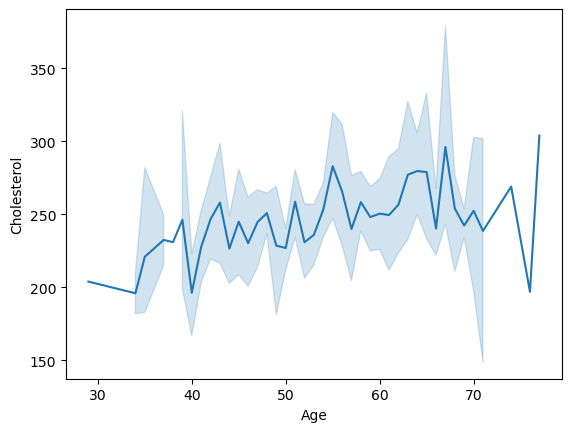

In [25]:
sns.lineplot(x='Age', y = 'Cholesterol', data=df)

In [26]:
#Blood pressure is at its peak at the age of 50-65

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BP', ylabel='Max HR'>

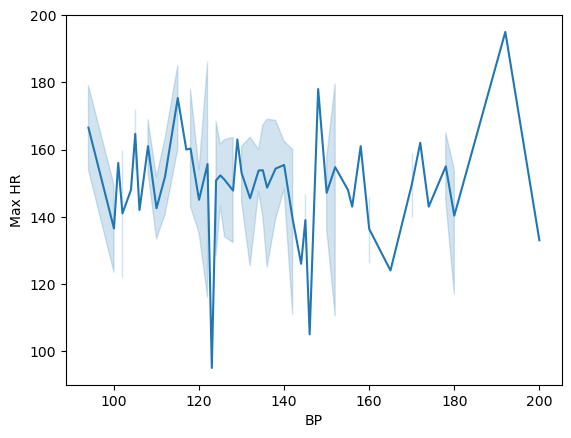

In [27]:
sns.lineplot(x='BP', y = 'Max HR', data=df)

In [28]:
#Maximum heartrate is seen at BP b/w 180-200

<Axes: xlabel='Heart Disease', ylabel='Max HR'>

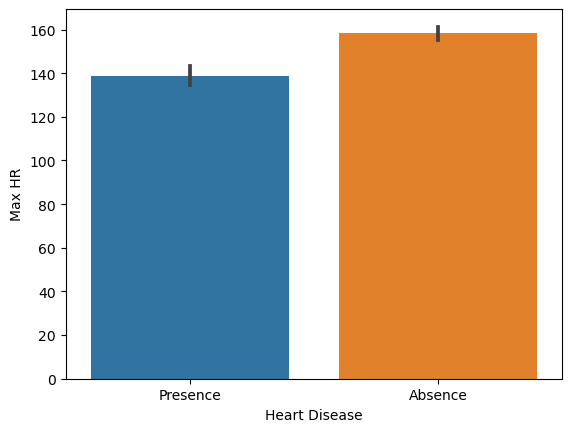

In [29]:
sns.barplot(x=df['Heart Disease'], y = df['Max HR'], data=df)

In [ ]:
sns

In [30]:
X

array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Decision Tree': DecisionTreeClassifier(criterion = 'entropy', random_state = 42),
    'Random Forest': RandomForestClassifier(n_estimators = 100,criterion = 'entropy', random_state = 0),
    'SVM': SVC(kernel ='linear', random_state = 0),
    'KNN': KNeighborsClassifier(n_neighbors= 5,p=2, metric='minkowski'),
    'Naive Bayes': GaussianNB() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Training Logistic Regression...
[[32  8]
 [ 6 22]]
Logistic Regression Accuracy: 0.79
Training Decision Tree...
[[31  9]
 [ 8 20]]
Decision Tree Accuracy: 0.75
Training Random Forest...
[[35  5]
 [ 6 22]]
Random Forest Accuracy: 0.84
Training SVM...
[[32  8]
 [ 6 22]]
SVM Accuracy: 0.79
Training KNN...
[[32  8]
 [ 7 21]]
KNN Accuracy: 0.78
Training Naive Bayes...
[[32  8]
 [ 7 21]]
Naive Bayes Accuracy: 0.78
